## Global Student Diversity Insights

**The hypothesis suggests a slow increase in the number of females in academic programs over the last decade. To support this idea, we'll take a close look at how many boys and girls were enrolled in different academic years using the Global_Student_Diversity_Insights database. This analysis aims to reveal noticeable patterns and differences in gender participation over specific time periods, providing useful insights into the complex dynamics of gender representation in education. The potential impact of this study goes beyond mere observation; it could help shape educational policies to create more inclusive and diverse academic environments worldwide.**

**Step 1: Import the database into VSCode and explore insights within the Global_Student_Diversity_Insights database.**

In [2]:
import numpy as np

import pandas as pd

import pymysql as mysql

import matplotlib.pyplot as plt

from sqlalchemy import create_engine

from sqlalchemy import text


In [3]:
# Defining the password variable
password = '123123123'

# Creating a connection to the Global_Student_Diversity_Insights database
conn = mysql.connect(host='localhost',
                     port=3306, user='root',
                     passwd=password,
                     db='Global_Student_Diversity_Insights')
# Create a SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{'root'}:{password}@{'localhost'}:{3306}/{'Global_Student_Diversity_Insights'}")


In [4]:
showTable = pd.read_sql("Show Tables ", engine)
showTable

,Tables_in_global_student_diversity_insights
0,academic_detail_modified
1,academic_modified
2,field_of_study_modified
3,origin_modified
4,source_of_fund_modified
5,status_modified


###### The "Global_Student_Diversity_Insights" dataset consists of six tables—academic details, enrollment, field of study, student origin, funding sources, and student status—offering comprehensive insights into various aspects of global student diversity.

In [5]:
academicDetailDisplay = pd.read_sql("SELECT * FROM academic_detail_modified;", engine)
print("Display of the table:")
academicDetailDisplay.head(3)

Display of the table:


,year,academic_type,academic_level,students
0,1999,Undergraduate,Associate's,59830
1,1999,Undergraduate,Bachelor's,177381
2,1999,Graduate,Master's,110857


In [6]:
academicDisplay = pd.read_sql("SELECT * FROM academic_modified;", engine)
print("Display of the table:")
academicDisplay.head(3)

Display of the table:


,year,students,us_students,undergraduate,graduate,non_degree,opt
0,1979,286343,11570000.0,172520.0,94130.0,16850.0,2840.0
1,1980,311882,12097000.0,186660.0,99110.0,21660.0,3450.0
2,1981,326299,12372000.0,195150.0,106290.0,21980.0,2880.0


In [7]:
studyFieldDisplay = pd.read_sql("SELECT * FROM field_of_study_modified;", engine)
print("Display of the table:")
studyFieldDisplay.head(3)

Display of the table:


,year,field_of_study,major,students
0,1998,Agriculture,Agriculture,6146.0
1,1998,Agriculture,Natural Resources and Conservation,1803.0
2,1998,Business and Management,Business and Management,101360.0


In [8]:
originDisplay = pd.read_sql("SELECT * FROM origin_modified;", engine)
print("Display of the table:")
originDisplay.head(3)


Display of the table:


,year,origin_region,origin,academic_type,students
0,2000,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Graduate,2
1,2000,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Other,0
2,2000,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Undergraduate,6


In [9]:
sourceOfFundDisplay = pd.read_sql("SELECT * FROM source_of_fund_modified;", engine)
print("Display of the table:")
sourceOfFundDisplay.head(3)

Display of the table:


,year,academic_type,source_type,source_of_fund,students
0,1999,Undergraduate,International,Personal and Family,201578
1,1999,Undergraduate,International,Foreign Government or University,9742
2,1999,Undergraduate,International,Foreign Private Sponsor,6245


In [10]:
statusDisplay = pd.read_sql("SELECT * FROM status_modified;", engine)
print("Display of the table:")
statusDisplay.head(3)

Display of the table:


,year,female,male,single,married,full_time,part_time,visa_f,visa_j,visa_other,female_percentage
0,2007,278841.0,344964.0,543958.0,79847.0,575772.0,48033.0,552691.0,31814.0,39300.0,44.700026
1,2008,304242.0,367374.0,591694.0,79922.0,613185.0,58431.0,589007.0,39625.0,42984.0,45.299993
2,2009,309534.0,381389.0,615612.0,75311.0,637722.0,53201.0,612158.0,38692.0,40073.0,44.800072


**Step 2 Basic Overview:**

In [11]:
academicDetail = pd.read_sql("""DESCRIBE academic_detail_modified;
""", engine)
print("The decribe table of academic detail modified:")
academicDetail


The decribe table of academic detail modified:


,Field,Type,Null,Key,Default,Extra
0,year,int,YES,,None,
1,academic_type,varchar(13),YES,,None,
2,academic_level,varchar(29),YES,,None,
3,students,int,YES,,None,


In [12]:
academic = pd.read_sql("""DESCRIBE academic_modified;
""", engine)
print("The decribe table of academic modified:")
academic

The decribe table of academic modified:


,Field,Type,Null,Key,Default,Extra
0,year,int,YES,,None,
1,students,int,YES,,None,
2,us_students,float,YES,,None,
3,undergraduate,float,YES,,None,
4,graduate,float,YES,,None,
5,non_degree,float,YES,,None,
6,opt,float,YES,,None,


In [13]:
studyField= pd.read_sql("""DESCRIBE field_of_study_modified;
""", engine)
print("The decribe table of field of study modified:")
studyField

The decribe table of field of study modified:


,Field,Type,Null,Key,Default,Extra
0,year,int,YES,,None,
1,field_of_study,varchar(33),YES,,None,
2,major,varchar(52),YES,,None,
3,students,double,YES,,None,


In [14]:
origin= pd.read_sql("""DESCRIBE origin_modified;
""", engine)
print("The decribe table of origin modified:")
origin

The decribe table of origin modified:


,Field,Type,Null,Key,Default,Extra
0,year,int,YES,,None,
1,origin_region,varchar(27),YES,,None,
2,origin,varchar(40),YES,,None,
3,academic_type,varchar(13),YES,,None,
4,students,int,YES,,None,


In [15]:
sourceOfFund = pd.read_sql("""DESCRIBE source_of_fund_modified;
""", engine)
print("The decribe table of source of fund modified:")
sourceOfFund

The decribe table of source of fund modified:


,Field,Type,Null,Key,Default,Extra
0,year,int,YES,,None,
1,academic_type,varchar(13),YES,,None,
2,source_type,varchar(13),YES,,None,
3,source_of_fund,varchar(32),YES,,None,
4,students,int,YES,,None,


In [16]:
status = pd.read_sql("""DESCRIBE status_modified;
""", engine)
print("The decribe table of status modified:")
status

The decribe table of status modified:


,Field,Type,Null,Key,Default,Extra
0,year,bigint,YES,,None,
1,female,double,YES,,None,
2,male,double,YES,,None,
3,single,double,YES,,None,
4,married,double,YES,,None,
5,full_time,double,YES,,None,
6,part_time,double,YES,,None,
7,visa_f,double,YES,,None,
8,visa_j,double,YES,,None,
9,visa_other,double,YES,,None,


In [17]:
# Load each table into a DataFrame for EDA
tables = ['status_modified', 'academic_modified', 'field_of_study_modified', 'origin_modified', 'source_of_fund_modified', 'academic_detail_modified']
for i in tables:
     # Load table into DataFrame
    dfDESCRIBE = pd.read_sql_query(f"DESCRIBE {i}", engine)
    # Display table name
    print(f"\n{i} - Basic Overview:")
    # Display Basic Overview:
    print(dfDESCRIBE)
# Close the engine connection
engine.dispose()
    


status_modified - Basic Overview:
                Field    Type Null Key Default Extra
0                year  bigint  YES        None      
1              female  double  YES        None      
2                male  double  YES        None      
3              single  double  YES        None      
4             married  double  YES        None      
5           full_time  double  YES        None      
6           part_time  double  YES        None      
7              visa_f  double  YES        None      
8              visa_j  double  YES        None      
9          visa_other  double  YES        None      
10  female_percentage  double  YES        None      

academic_modified - Basic Overview:
           Field   Type Null Key Default Extra
0           year    int  YES        None      
1       students    int  YES        None      
2    us_students  float  YES        None      
3  undergraduate  float  YES        None      
4       graduate  float  YES        None      
5     non_

**Step 3 Summary Statistics**

In [18]:
# Load each table into a DataFrame for EDA
tables = ['status_modified', 'academic_modified', 'field_of_study_modified', 'origin_modified', 'source_of_fund_modified', 'academic_detail_modified']
for i in tables:
     # Load table into DataFrame
    df = pd.read_sql_query(f"SELECT * FROM {i}", engine)
    # Display table name
    print(f"\n{i} - Summary Statistics:")
    # Display summary statistics
    print(df.describe())
# Close the engine connection
engine.dispose()
    
    


status_modified - Summary Statistics:
              year         female           male        single        married  \
count    16.000000      16.000000      16.000000  1.600000e+01      16.000000   
mean   2014.500000  400165.875000  503758.375000  8.186190e+05   85305.250000   
std       4.760952   71337.004816   96374.058647  1.594363e+05    9826.503247   
min    2007.000000  278841.000000  344964.000000  5.439580e+05   69435.000000   
25%    2010.750000  334648.750000  419541.750000  6.812148e+05   78660.500000   
50%    2014.500000  416864.500000  513098.500000  8.442555e+05   87051.500000   
75%    2018.250000  471179.500000  593386.750000  9.674375e+05   91414.000000   
max    2022.000000  480836.000000  617463.000000  1.002199e+06  107882.000000   

          full_time     part_time        visa_f        visa_j    visa_other  \
count  1.600000e+01     16.000000  1.600000e+01     16.000000     16.000000   
mean   8.431138e+05  60810.500000  8.276002e+05  40853.562500  35470.5000

**Step 4 Missing Values:**

In [19]:
for table in tables:
    # Load table into DataFrame
    df = pd.read_sql_table(table, engine)
    # Check for missing values
    print(f"\n{table} - Missing Values:")
    print(df.isnull().sum())

# Close the engine connection
engine.dispose()


status_modified - Missing Values:
year                 0
female               0
male                 0
single               0
married              0
full_time            0
part_time            0
visa_f               0
visa_j               0
visa_other           0
female_percentage    0
dtype: int64

academic_modified - Missing Values:
year             0
students         0
us_students      0
undergraduate    0
graduate         0
non_degree       0
opt              0
dtype: int64

field_of_study_modified - Missing Values:
year              0
field_of_study    0
major             0
students          0
dtype: int64

origin_modified - Missing Values:
year             0
origin_region    0
origin           0
academic_type    0
students         0
dtype: int64

source_of_fund_modified - Missing Values:
year              0
academic_type     0
source_type       0
source_of_fund    0
students          0
dtype: int64

academic_detail_modified - Missing Values:
year              0
academic_type    

**Step 5 Data Transformation**

In [20]:
# Calculate Female Percentage and update the DataFrame
statusDisplay['female_percentage'] = (statusDisplay['female'] / (statusDisplay['female'] + statusDisplay['male'])) * 100

# Assuming 'engine' is your SQLAlchemy engine
# Use the 'if_exists' parameter to replace the existing 'status_modified' table
statusDisplay.to_sql('status_modified', engine, if_exists='replace', index=False)

# Now, retrieve and display the updated table
updated_status = pd.read_sql("SELECT * FROM status_modified;", engine)
updated_status.head()

,year,female,male,single,married,full_time,part_time,visa_f,visa_j,visa_other,female_percentage
0,2007,278841.0,344964.0,543958.0,79847.0,575772.0,48033.0,552691.0,31814.0,39300.0,44.700026
1,2008,304242.0,367374.0,591694.0,79922.0,613185.0,58431.0,589007.0,39625.0,42984.0,45.299993
2,2009,309534.0,381389.0,615612.0,75311.0,637722.0,53201.0,612158.0,38692.0,40073.0,44.800072
3,2010,322582.0,400695.0,653842.0,69435.0,669031.0,54246.0,645163.0,40504.0,37610.0,44.600063
4,2011,338671.0,425824.0,690339.0,74156.0,714038.0,50457.0,688810.0,42047.0,33638.0,44.299963


In [21]:
print(originDisplay.columns)


Index(['year', 'origin_region', 'origin', 'academic_type', 'students'], dtype='object')


In [22]:
# Merge academicDetailDisplay with academicDisplay
merged_academic = pd.merge(academicDetailDisplay, academicDisplay, on='year', how='inner')
# Merge with studyFieldDisplay based on 'year' and 'field_of_study' columns
merged_academic = pd.merge(merged_academic, studyFieldDisplay, on=['year'], how='inner')
# Merge with originDisplay based on 'year' column
merged_academic = pd.merge(merged_academic, originDisplay, on=['year'], how='inner', suffixes=('_academic', '_origin'))
# Merge with sourceOfFundDisplay based on 'year' and 'academic_type' columns
merged_academic = pd.merge(merged_academic, sourceOfFundDisplay, on=['year'], how='inner', suffixes=('_academic', '_source_of_fund'))
# Merge with statusDisplay
merged_academic = pd.merge(merged_academic, statusDisplay, on='year', how='inner')
# Now, 'merged_academic' contains the result of all the inner joins
# Display a subset of the merged DataFrame
print(merged_academic.head())



Empty DataFrame
Columns: [year, academic_type_academic, academic_level, students_x, students_y, us_students, undergraduate, graduate, non_degree, opt, field_of_study, major, students_academic, origin_region, origin, academic_type_origin, students_origin, academic_type, source_type, source_of_fund, students, female, male, single, married, full_time, part_time, visa_f, visa_j, visa_other, female_percentage]
Index: []

[0 rows x 31 columns]


**Step 6 Statistical Analysis**

In [23]:
# Total Enrollment Over the Years:
total_enrollment = pd.read_sql_query(
    """
    SELECT year, SUM(female) AS total_female, SUM(male) AS total_male
    FROM status_modified
    GROUP BY year
    ORDER BY year;
    """, engine)


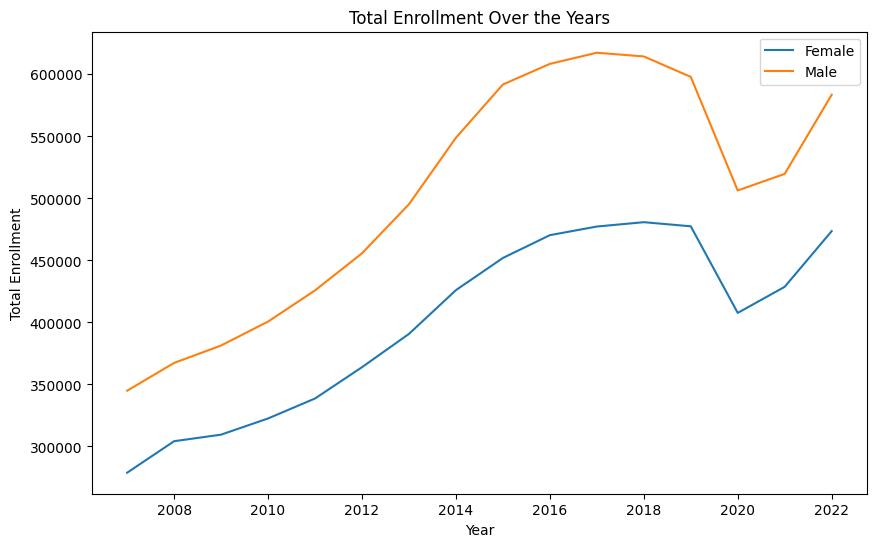

In [24]:
# Plot Total Enrollment Over the Years
plt.figure(figsize=(10, 6))
plt.plot(total_enrollment['year'], total_enrollment['total_female'], label='Female')
plt.plot(total_enrollment['year'], total_enrollment['total_male'], label='Male')
plt.title('Total Enrollment Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.legend()
plt.show()

In [25]:
# Total Enrollment Over the Years:
total_enrollment = pd.read_sql_query(
    """
    SELECT
    year,
    ROUND(total_female / (total_female + total_male) * 100, 2) AS female_percentage
FROM
    (
        SELECT
            year,
            SUM(female) AS total_female,
            SUM(male) AS total_male
        FROM
            status_modified
        GROUP BY
            year
        ORDER BY
            year
    ) AS total_enrollment;


    """, engine)
total_enrollment

,year,female_percentage
0,2007,44.7
1,2008,45.3
2,2009,44.8
3,2010,44.6
4,2011,44.3
5,2012,44.4
6,2013,44.1
7,2014,43.7
8,2015,43.3
9,2016,43.6


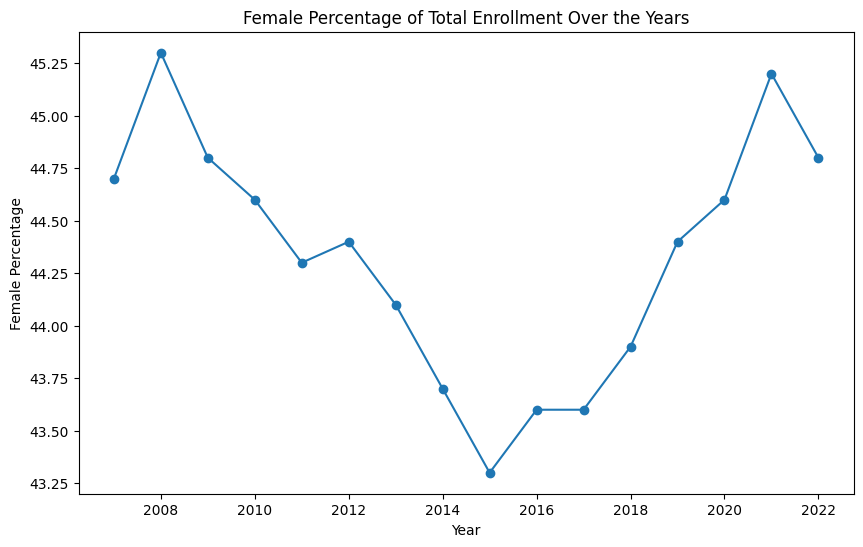

In [39]:
# Plot Total Enrollment Over the Years
plt.figure(figsize=(10, 6))
plt.plot(total_enrollment['year'], total_enrollment['female_percentage'], marker='o')
plt.title('Female Percentage of Total Enrollment Over the Years')
plt.xlabel('Year')
plt.ylabel('Female Percentage')
plt.show()

In [27]:
# Average Female Percentage Over the Entire Period:
average_gender_percentage  = pd.read_sql_query(
    """
    SELECT
    AVG(total_female / (total_female + total_male) * 100) AS average_female_percentage,
    AVG(total_male / (total_female + total_male) * 100) AS average_male_percentage
FROM (
    SELECT
        SUM(female) AS total_female,
        SUM(male) AS total_male
    FROM status_modified
) AS total_enrollment;

    """, engine)
average_gender_percentage 

,average_female_percentage,average_male_percentage
0,44.269846,55.730154


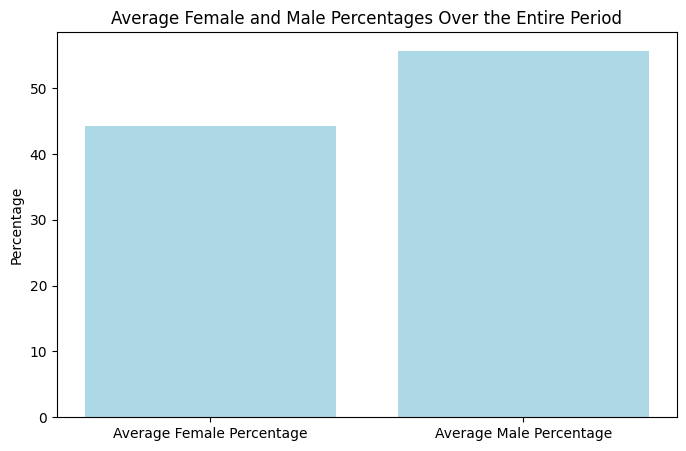

In [32]:
# Plot Average Female and Male Percentages
plt.figure(figsize=(8, 5))
plt.bar(['Average Female Percentage', 'Average Male Percentage'],
        [average_gender_percentage['average_female_percentage'].iloc[0],
         average_gender_percentage['average_male_percentage'].iloc[0]], color = 'lightblue')
plt.title('Average Female and Male Percentages Over the Entire Period')
plt.ylabel('Percentage')
plt.show()

In [29]:
# Yearly Change in Female Percentage:
yearly_change =  pd.read_sql_query(
    """
    SELECT
    year,
    ROUND(
        (LEAD(total_female / (total_female + total_male) * 100) OVER (ORDER BY year) -
         total_female / (total_female + total_male) * 100), 2) AS change_in_female_percentage
FROM (
    SELECT
        year,
        SUM(female) AS total_female,
        SUM(male) AS total_male
    FROM
        status_modified
    GROUP BY
        year
    ORDER BY
        year
) AS total_enrollment;

    """, engine)
yearly_change 

,year,change_in_female_percentage
0,2007,0.6
1,2008,-0.5
2,2009,-0.2
3,2010,-0.3
4,2011,0.1
5,2012,-0.3
6,2013,-0.4
7,2014,-0.4
8,2015,0.3
9,2016,0.0


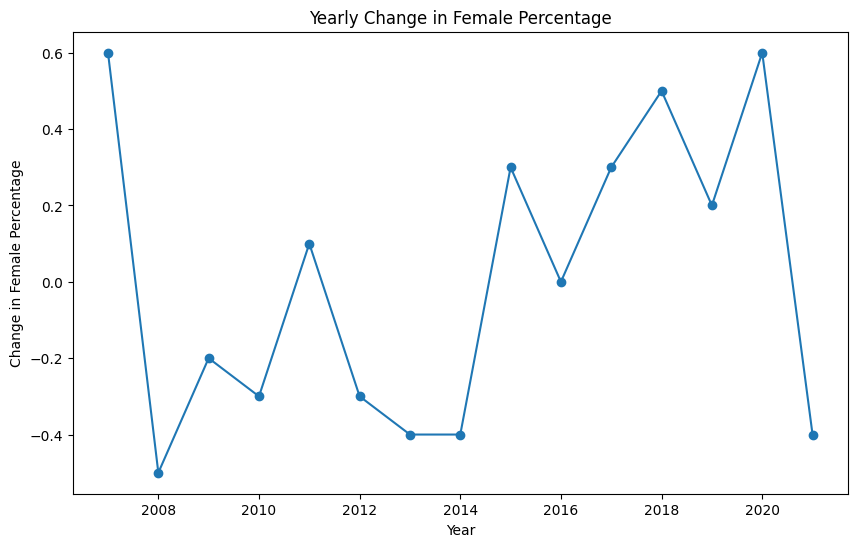

In [30]:
# Plot Yearly Change in Female Percentage
plt.figure(figsize=(10, 6))
plt.plot(yearly_change['year'], yearly_change['change_in_female_percentage'], marker='o')
plt.title('Yearly Change in Female Percentage')
plt.xlabel('Year')
plt.ylabel('Change in Female Percentage')
plt.show()

In [31]:
# Year with the Highest Female Percentage:
highest_female_percentage = pd.read_sql_query(
    """
    SELECT
    year,
    female_percentage
FROM (
    SELECT
        year,
        ROUND(SUM(female) / (SUM(female) + SUM(male)) * 100, 2) AS female_percentage
    FROM
        status_modified
    GROUP BY
        year
    ORDER BY
        female_percentage DESC
    LIMIT 1
) AS year_with_highest_female_percentage;

    """, engine)
highest_female_percentage

,year,female_percentage
0,2008,45.3


**Step 7: Create a Data Pipeline for Tableau Integration**